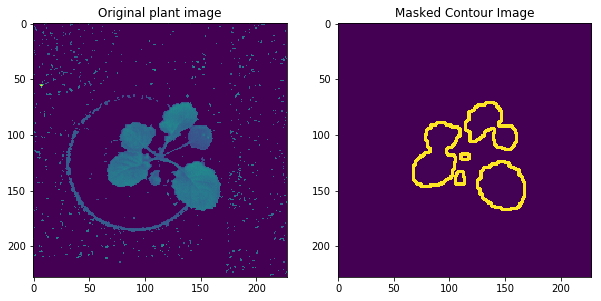

 ------------------------ P= 8 , R=1------------------ 


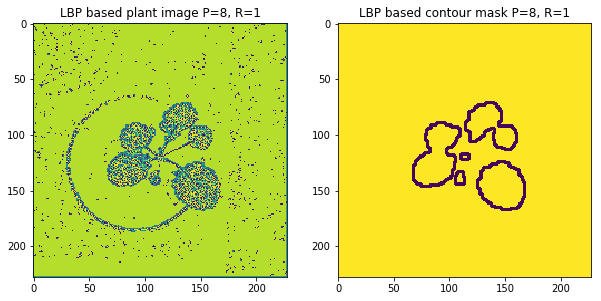

 Pass bins are:
[ 1212   913   355   727   682  1351   305   402 45063   974]
 Cmask bins are:
[122 121  96 259 275 143  45  33 578 139]


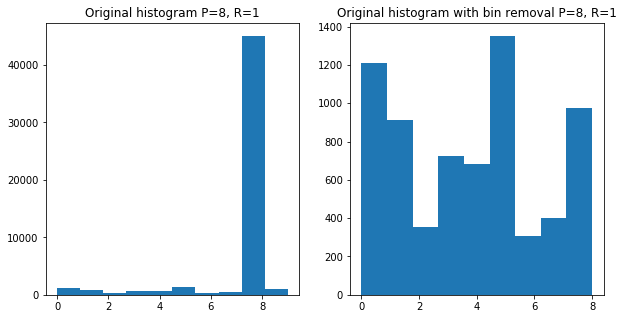

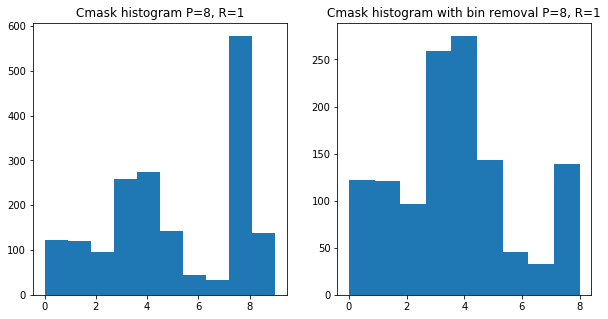

 ------------------------ P= 16 , R=2------------------ 


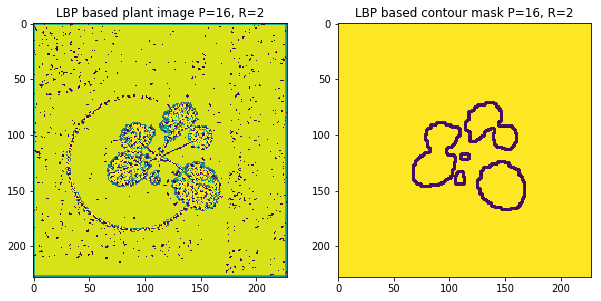

 Pass bins are:
[ 1444   514   250   141   139   158   217   306   253  1020   165   893
   128    88   124   173 43978  1993]
 Cmask bins are:
[115  86  43  32  50  76 121 157 123  81  55  27  10   8   3   0 563 261]


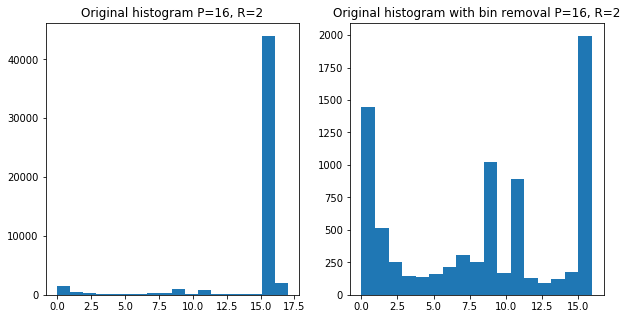

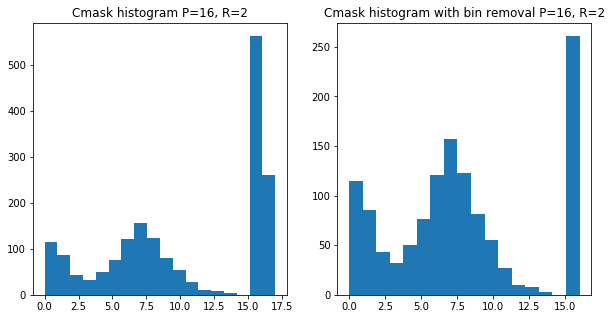

 ------------------------ P= 24 , R=3------------------ 


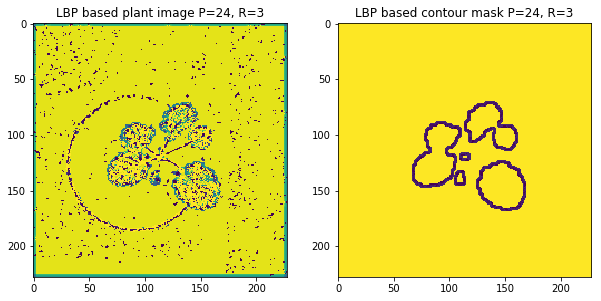

 Pass bins are:
[ 1500   373   210   130    89    63    65    58    92   128   162   157
   102   941   104   856   122   799    72    69    37    36    87    93
 43011  2628]
 Cmask bins are:
[113  47  41  24  25  23  19  25  55  74 119 106  60  70  21  18  21   3
   9   4   0   0   0   0 563 371]


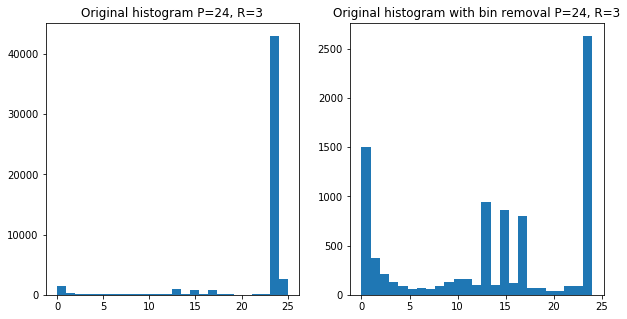

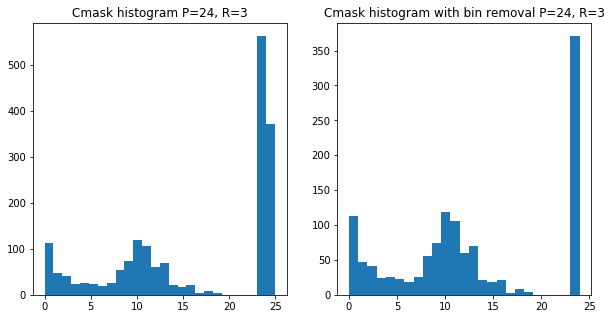

 ------------------------- COMBINED BINS -------------------------------
 The number of combined bins = 54
 The number of filtered and combined bins = 51


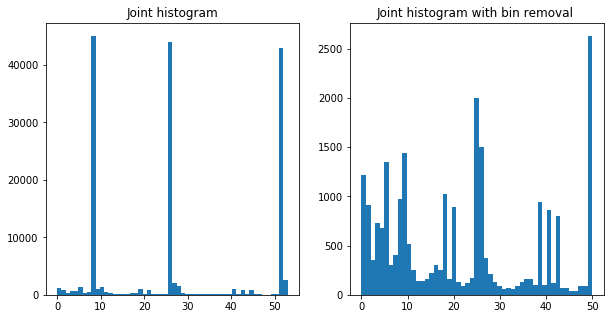

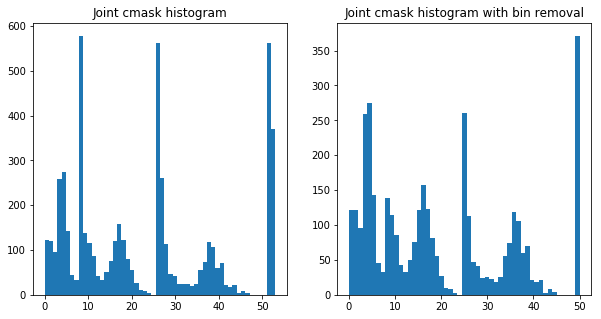

In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from skimage import feature

plt.rcParams['figure.figsize'] = (10,5)

pass_img_filename = "/scratch/data/bccr_dataset_can_rad/work/can/can1S3-r3-108_b1.bmp"
cmask_img_filename = "/scratch/data/bccr_dataset_can_rad/work_cmask_T-2/can/can1S3-r3-108_b1.bmp"

#pass_img_filename = "/scratch/data/can-rad dataset/work/rad/rad1S3-r15-550_b0.bmp"
#cmask_img_filename = "/scratch/data/can-rad dataset/work_cmask_T-2/rad/rad1S3-r15-550_b0.bmp"


pass_img   = cv2.imread(pass_img_filename, cv2.IMREAD_GRAYSCALE)
cmask_img   = cv2.imread(cmask_img_filename, cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1)
plt.imshow(pass_img)
plt.title('Original plant image')
plt.subplot(1,2,2)
plt.imshow(cmask_img)
plt.title('Masked Contour Image')
plt.show()

n_arr=[8,16,24]
r_arr=[1,2,3]
bins_combined_pass  = []
bins_combined_cmask = []

filtered_bins_combined_pass  = []
filtered_bins_combined_cmask = []


for i in range(len(n_arr)):
    n = n_arr[i]
    r = r_arr[i]
    print (' ------------------------ P= %d , R=%d------------------ ' %(n,r))
    pass_lbp_matrix  = feature.local_binary_pattern(pass_img, n, r, method="uniform")
    cmask_lbp_matrix  = np.where((cmask_img==255),pass_lbp_matrix,255)
    plt.subplot(1,2,1)
    plt.imshow(pass_lbp_matrix)
    plt.title('LBP based plant image P=%d, R=%d' %(n,r))
    plt.subplot(1,2,2)
    plt.imshow(cmask_lbp_matrix)
    plt.title('LBP based contour mask P=%d, R=%d' %(n,r))
    plt.show()

    pass_bins, pass_edges = np.histogram(pass_lbp_matrix.ravel(),bins=np.arange(0, n+3), range=(0,n+2))
    cmask_bins, cmask_edges = np.histogram(cmask_lbp_matrix.ravel(),bins=np.arange(0, n+3), range=(0,n+2))

    bin_to_delete = len(pass_bins)-2
    filtered_pass_bins = np.delete(pass_bins,[bin_to_delete],0)
    filtered_cmask_bins = np.delete(cmask_bins,[bin_to_delete],0)
    print ' Pass bins are:'
    print pass_bins
    print ' Cmask bins are:'
    print cmask_bins

    plt.subplot(1,2,1)
    plt.hist(range(len(pass_bins)), bins=len(pass_bins), weights=pass_bins)
    plt.title('Original histogram P=%d, R=%d' %(n,r))
    plt.subplot(1,2,2)
    plt.hist(range(len(filtered_pass_bins)), bins=len(filtered_pass_bins), weights=filtered_pass_bins)
    plt.title('Original histogram with bin removal P=%d, R=%d' %(n,r))
    plt.show()

    plt.subplot(1,2,1)
    plt.hist(range(len(cmask_bins)), bins=len(cmask_bins), weights=cmask_bins)
    plt.title('Cmask histogram P=%d, R=%d' %(n,r))
    plt.subplot(1,2,2)
    plt.hist(range(len(filtered_cmask_bins)), bins=len(filtered_cmask_bins), weights=filtered_cmask_bins)
    plt.title('Cmask histogram with bin removal P=%d, R=%d' %(n,r))
    plt.show()
    
    # Now append the bins to the previous histogram
    bins_combined_pass = np.concatenate((bins_combined_pass,pass_bins), axis=0 )
    bins_combined_cmask = np.concatenate((bins_combined_cmask,cmask_bins), axis=0 )
    
    
    filtered_bins_combined_pass = np.concatenate((filtered_bins_combined_pass,filtered_pass_bins), axis=0 )
    filtered_bins_combined_cmask= np.concatenate((filtered_bins_combined_cmask,filtered_cmask_bins), axis=0 )
    
print ' ------------------------- COMBINED BINS -------------------------------'

print ' The number of combined bins = %d' %len(bins_combined_pass)
print ' The number of filtered and combined bins = %d' %len(filtered_bins_combined_pass)


plt.subplot(1,2,1)
plt.hist(range(len(bins_combined_pass)), bins=len(bins_combined_pass), weights=bins_combined_pass)
plt.title('Joint histogram')
plt.subplot(1,2,2)
plt.hist(range(len(filtered_bins_combined_pass)), bins=len(filtered_bins_combined_pass), weights=filtered_bins_combined_pass)
plt.title('Joint histogram with bin removal ')
plt.show()

plt.subplot(1,2,1)
plt.hist(range(len(bins_combined_cmask)), bins=len(bins_combined_cmask), weights=bins_combined_cmask)
plt.title('Joint cmask histogram')
plt.subplot(1,2,2)
plt.hist(range(len(filtered_bins_combined_cmask)), bins=len(filtered_bins_combined_cmask), weights=filtered_bins_combined_cmask)
plt.title('Joint cmask histogram with bin removal')
plt.show()


